In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
df = pd.read_csv('../data/creditcard.csv')
unseen = df.sample(frac = 0.1, random_state = 42)
df = df.drop(unseen.index)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [4]:
expt = setup(data = df, target = 'Class', session_id = 42, ignore_features = ['Time'], train_size = 0.8, normalize = True, fix_imbalance = True, polynomial_features = True)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [6]:
top_5 = compare_models(sort = "F1", exclude = ["ada", "gbc"], n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9668,0.8159,0.8797,0.8460,0.8457,0.8466,14.4490
rf,Random Forest Classifier,0.9994,0.9621,0.7933,0.8425,0.8166,0.8163,0.8169,40.1530
lightgbm,Light Gradient Boosting Machine,0.9987,0.9575,0.8213,0.5982,0.6907,0.6901,0.6995,1.8850
knn,K Neighbors Classifier,0.9978,0.9299,0.8440,0.4354,0.5737,0.5727,0.6049,50.1210
dt,Decision Tree Classifier,0.9975,0.8743,0.7506,0.3891,0.5116,0.5105,0.5388,4.9650
qda,Quadratic Discriminant Analysis,0.9886,0.9589,0.8552,0.1170,0.2057,0.2033,0.3136,1.1730
ridge,Ridge Classifier,0.9865,0.0000,0.8640,0.1011,0.1809,0.1783,0.2927,0.2490
lda,Linear Discriminant Analysis,0.9865,0.9767,0.8640,0.1011,0.1809,0.1783,0.2927,1.0150
nb,Naive Bayes,0.9810,0.9548,0.8497,0.0725,0.1335,0.1308,0.2449,0.2420
lr,Logistic Regression,0.9686,0.9716,0.9093,0.0477,0.0906,0.0877,0.2043,1.7350


In [7]:
for model in top_5:
    print(model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False

In [8]:
tuned_et = tune_model(top_5[0], fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9988,0.9773,0.7429,0.6190,0.6753,0.6747,0.6775
1,0.9988,0.9625,0.8286,0.5979,0.6946,0.6940,0.7033
2,0.9987,0.9603,0.8169,0.5800,0.6784,0.6777,0.6877
3,0.9989,0.9916,0.9014,0.6154,0.7314,0.7309,0.7443
4,0.9989,0.9568,0.8169,0.6444,0.7205,0.7200,0.7250
Mean,0.9988,0.9697,0.8213,0.6114,0.7000,0.6995,0.7076
SD,0.0001,0.0130,0.0503,0.0216,0.0224,0.0225,0.0244


In [9]:
rf = top_5[1]
rf_parameters = {'n_estimators': np.arange(10, 200, 10), 'min_samples_leaf': [1, 2], 'min_samples_split': np.arange(2, 6)}
tuned_rf = tune_model(rf, custom_grid = rf_parameters, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,0.9707,0.7286,0.7969,0.7612,0.7608,0.7616
1,0.9994,0.9609,0.7714,0.8438,0.8060,0.8057,0.8065
2,0.9993,0.9336,0.7887,0.8235,0.8058,0.8054,0.8056
3,0.9997,0.9881,0.8592,0.9385,0.8971,0.8969,0.8978
4,0.9994,0.9696,0.7746,0.8594,0.8148,0.8145,0.8156
Mean,0.9994,0.9646,0.7845,0.8524,0.8170,0.8167,0.8174
SD,0.0001,0.0178,0.0424,0.0478,0.0442,0.0443,0.0444


In [10]:
lgbm_tuned = tune_model(top_5[2], fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9779,0.7429,0.7222,0.7324,0.7319,0.7320
1,0.9992,0.9559,0.8429,0.7284,0.7815,0.7811,0.7831
2,0.9990,0.9467,0.8028,0.6951,0.7451,0.7446,0.7466
3,0.9994,0.9916,0.8873,0.7975,0.8400,0.8397,0.8409
4,0.9994,0.9730,0.8169,0.8286,0.8227,0.8224,0.8224
Mean,0.9992,0.9690,0.8186,0.7544,0.7843,0.7839,0.7850
SD,0.0002,0.0160,0.0475,0.0502,0.0420,0.0421,0.0420


In [11]:
knn = top_5[3]
knn_params = {'leaf_size': np.arange(10, 200, 10), 'n_neighbors': np.arange(2, 8), 'p': [1, 2]}
tuned_knn = tune_model(knn, custom_grid = knn_params, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9989,0.9067,0.7714,0.6429,0.7013,0.7007,0.7037
1,0.9992,0.9068,0.8143,0.7500,0.7808,0.7804,0.7811
2,0.9990,0.9010,0.8028,0.6628,0.7261,0.7256,0.7289
3,0.9992,0.9504,0.8732,0.7126,0.7848,0.7844,0.7885
4,0.9992,0.9082,0.7746,0.7639,0.7692,0.7688,0.7688
Mean,0.9991,0.9146,0.8073,0.7064,0.7525,0.7520,0.7542
SD,0.0001,0.0180,0.0368,0.0473,0.0330,0.0331,0.0326


In [12]:
dt = top_5[4]
dt_params = {'min_samples_split': np.arange(2,12,1), 'max_features': ["auto", "sqrt", "log2"]}
tuned_dt = tune_model(dt, custom_grid = dt_params, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9972,0.8702,0.7429,0.3490,0.4749,0.4737,0.5080
1,0.9976,0.8847,0.7714,0.3971,0.5243,0.5232,0.5525
2,0.9979,0.8724,0.7465,0.4344,0.5492,0.5482,0.5685
3,0.9975,0.8863,0.7746,0.3929,0.5213,0.5202,0.5506
4,0.9980,0.8865,0.7746,0.4545,0.5729,0.5720,0.5925
Mean,0.9976,0.8800,0.7620,0.4056,0.5285,0.5275,0.5544
SD,0.0003,0.0072,0.0143,0.0365,0.0327,0.0328,0.0276


In [13]:
blended_model = blend_models(estimator_list = [tuned_et, tuned_rf, lgbm_tuned, tuned_knn, tuned_dt])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9847,0.7429,0.8125,0.7761,0.7758,0.7765
1,0.9995,0.9694,0.8286,0.8529,0.8406,0.8403,0.8404
2,0.9996,0.9883,0.8571,0.9091,0.8824,0.8822,0.8825
3,0.9993,0.9331,0.7714,0.8182,0.7941,0.7938,0.7941
4,0.9993,0.9578,0.8286,0.7838,0.8056,0.8052,0.8055
5,0.9993,0.9647,0.7714,0.7941,0.7826,0.7822,0.7823
6,0.9997,0.9984,0.9143,0.8889,0.9014,0.9012,0.9013
7,0.9996,0.9925,0.8889,0.8649,0.8767,0.8765,0.8766
8,0.9992,0.9703,0.7500,0.7941,0.7714,0.7710,0.7714
9,0.9997,0.9703,0.8611,0.9688,0.9118,0.9116,0.9132


In [14]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9996,0.9879,0.8495,0.9186,0.8827,0.8825,0.8832


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14_Power2,V17_Power2,V12_Power2,V16_Power2,V19_Power2,V10_Power2,V4_Power2,Class,Label,Score
0,0.538860,-0.264890,0.581722,0.433980,-0.762300,-0.052061,-0.607471,0.319208,0.607767,0.125471,...,-0.033252,-0.091189,-0.104374,-0.179909,-0.235287,-0.166162,-0.373280,0,0,0.9457
1,0.520079,-0.074854,0.512299,0.841550,-0.471953,-0.025205,-0.310032,0.224924,0.180408,0.174273,...,-0.068795,-0.082845,-0.208248,-0.241451,-0.149309,-0.163729,-0.133961,0,0,0.9417
2,0.291984,0.552464,-0.857232,-0.368633,0.688975,0.341489,-0.518032,-2.225461,-0.455774,-1.163601,...,-0.155473,-0.098393,0.054452,0.093937,-0.515681,0.060579,-0.397685,0,0,0.9406
3,-0.387849,0.320123,0.994165,-0.747898,0.124010,0.709494,0.305602,0.294808,-0.245327,-0.458469,...,-0.164686,-0.023193,-0.120636,-0.056760,-0.173642,-0.132923,-0.202989,0,0,0.9445
4,-0.274353,0.281240,1.088880,0.226552,-0.947547,0.412891,0.731122,0.008724,-0.073483,-0.387724,...,-0.197652,-0.099279,-0.182849,-0.272799,-0.513888,-0.143076,-0.436388,0,0,0.9452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,-0.507999,1.747756,-1.909770,0.984071,0.177885,-1.032910,0.025103,0.752847,-0.024872,-0.060296,...,1.696971,1.312948,-0.182964,-0.041169,-0.152266,-0.168068,-0.014204,0,0,0.9262
51262,-0.977367,-0.600678,0.033809,-0.292629,-3.041962,2.277253,2.696853,0.276765,0.204897,-1.528903,...,-0.197347,-0.094049,-0.147958,-0.260147,-0.169689,0.226802,-0.420782,0,0,0.9400
51263,0.234095,-0.891354,0.119515,0.376856,-0.352427,0.983732,-0.209680,0.214497,0.435524,-0.246653,...,-0.183033,-0.006353,0.058503,-0.128058,-0.510415,-0.158279,-0.394610,0,0,0.9445
51264,0.924674,-0.425163,-0.929382,-0.071914,0.346293,0.784553,-0.262361,0.321758,0.950451,-0.146921,...,-0.122655,-0.086168,-0.117516,0.041173,-0.486452,-0.164975,-0.457725,0,0,0.9447


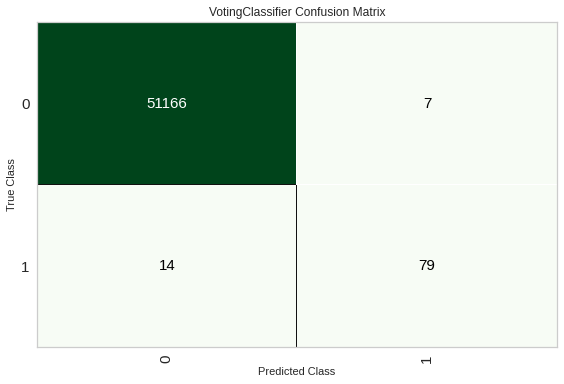

In [15]:
plot_model(blended_model, plot = 'confusion_matrix')

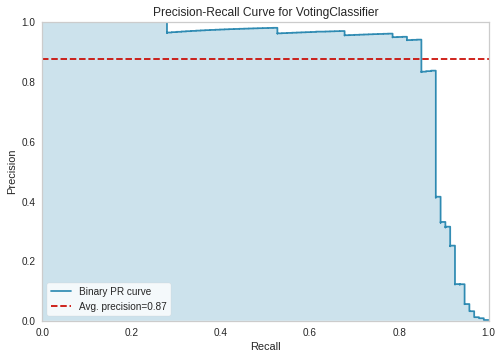

In [17]:
plot_model(blended_model, plot = 'pr')

In [16]:
predictions = predict_model(blended_model, data = unseen)

NameError: name 'check_metric' is not defined

In [19]:
from pycaret.utils import check_metric
print("Accuracy: ", check_metric(predictions.Class, predictions.Label, 'Accuracy'))
print("Precision: ", check_metric(predictions.Class, predictions.Label, 'Precision'))
print("Recall: ", check_metric(predictions.Class, predictions.Label, 'Recall'))
print("F1: ", check_metric(predictions.Class, predictions.Label, 'F1'))

Accuracy:  0.9995
Precision:  0.8636
Recall:  0.8261
F1:  0.8444


In [ ]:
save_model(blended_model, "../models/blended_model")